In [21]:
import pandas as pd
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df = pd.read_csv(r'..\data\processed\train_cleaned.csv')
val_df = pd.read_csv(r'..\data\processed\val_cleaned.csv')
test_df = pd.read_csv(r'..\data\processed\test_cleaned.csv')

In [22]:
train_df.head(3)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632
2,2012-03-31,75750.0,92400.0,165.898618,63.412698,2.0,2.0,4.0,13.0,193.0,0.986815,0.000000,0.000000,PGH,15468,2012,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,2171.0,47.8,18740.0,2094.0,1252.0,627.0,62800.0,894.0,30.0,2106.0,2106.0,807.0,60152.096646,Pittsburgh,40.4744,-79.8632


## Extracting Date Features

In [23]:
def add_date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month

    # reorder the columns
    df.insert(1, 'year', df.pop('year'))
    df.insert(2, 'quarter', df.pop('quarter'))
    df.insert(3, 'month', df.pop('month'))
    return df

In [24]:
train_df = add_date_features(train_df)
val_df = add_date_features(val_df)
test_df = add_date_features(test_df)

In [25]:
train_df.head(3)

,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,2012,1,3,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,2012,1,3,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632
2,2012-03-31,2012,1,3,75750.0,92400.0,165.898618,63.412698,2.0,2.0,4.0,13.0,193.0,0.986815,0.000000,0.000000,PGH,15468,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,2171.0,47.8,18740.0,2094.0,1252.0,627.0,62800.0,894.0,30.0,2106.0,2106.0,807.0,60152.096646,Pittsburgh,40.4744,-79.8632


In [26]:
val_df.head(3)

,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2020-01-31,2020,1,1,184000.0,168450.0,123.333333,109.899800,35.0,30.0,34.0,37.0,50.0,0.954732,0.171429,0.300000,CHI,60482,3.0,0.0,2.0,0.0,68.0,30.0,60.0,5.0,14.0,10849.0,42.1,27037.0,10795.0,4598.0,964.0,169000.0,5690.0,414.0,10573.0,10573.0,5089.0,1.648397e+05,Chicago-Naperville-Elgin,41.6675,-87.9597
1,2020-01-31,2020,1,1,140000.0,139000.0,94.691957,111.311054,61.0,81.0,83.0,54.0,10.0,0.963039,0.098361,0.469136,CIN,41071,35.0,5.0,4.0,3.0,139.0,259.0,86.0,1.0,8.0,20624.0,36.6,30324.0,19423.0,10164.0,802.0,132400.0,10479.0,552.0,19809.0,19809.0,9383.0,1.321643e+05,Cincinnati,39.0811,-84.4646
2,2020-01-31,2020,1,1,1040000.0,1600000.0,1386.111111,1801.309410,134.0,151.0,210.0,563.0,188.0,0.971567,0.037313,0.006623,NY,10023,344.0,11.0,26.0,8.0,404.0,2054.0,324.0,114.0,172.0,62541.0,43.3,126937.0,60995.0,41353.0,2346.0,1218900.0,37308.0,1440.0,60206.0,60206.0,31554.0,1.494755e+06,New York-Newark-Jersey City,40.7222,-74.0225


In [27]:
test_df.head(3)

,date,year,quarter,month,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2022-01-31,2022,1,1,340000.0,349999.0,189.867865,195.526649,282.0,287.0,241.0,73.0,12.0,0.991177,0.308511,0.634146,ORL,32771,9.0,0.0,1.0,1.0,56.0,64.0,18.0,4.0,9.0,57074.0,37.7,33896.0,56681.0,22246.0,1289.0,261800.0,29485.0,1469.0,55621.0,55621.0,24381.0,314667.746005,Orlando-Kissimmee-Sanford,28.4343,-81.363
1,2022-01-31,2022,1,1,310000.0,269900.0,243.839836,239.543726,49.0,47.0,43.0,7.0,6.5,1.006586,0.489796,0.723404,TPA,33778,21.0,0.0,3.0,2.0,35.0,57.0,32.0,0.0,22.0,15912.0,47.8,31277.0,15405.0,7865.0,1161.0,206600.0,7846.0,345.0,15423.0,15423.0,6733.0,325271.243813,Tampa-St. Petersburg-Clearwater,28.1538,-82.405
2,2022-01-31,2022,1,1,274950.0,299450.0,175.320145,287.500000,4.0,3.0,6.0,2.0,33.0,0.975694,0.000000,0.666667,PHL,21914,3.0,0.0,0.0,0.0,8.0,15.0,7.0,0.0,2.0,725.0,51.1,36407.0,725.0,477.0,1393.0,265000.0,268.0,12.0,714.0,714.0,250.0,278119.378304,Philadelphia-Camden-Wilmington,39.9056,-75.302


## Encoding Categorical Features

* fit on the Training data only and transform on Validation and Test data
* To Avoid Data Leakage

In [28]:
# Encoding Zipcode using freaquency encoding
zip_freq = train_df['zipcode'].value_counts().to_dict()

train_df['zipcode_freq'] = train_df['zipcode'].map(zip_freq)
val_df['zipcode_freq'] = val_df['zipcode'].map(zip_freq)
test_df['zipcode_freq'] = test_df['zipcode'].map(zip_freq)

In [29]:
print ('zip_freq', zip_freq)

zip_freq {30002: 94, 76044: 94, 76108: 94, 76109: 94, 76110: 94, 75142: 94, 76111: 94, 76085: 94, 75152: 94, 76249: 94, 76059: 94, 76050: 94, 76107: 94, 76051: 94, 76052: 94, 75160: 94, 76053: 94, 76054: 94, 76058: 94, 75159: 94, 76060: 94, 76082: 94, 75143: 94, 76106: 94, 75158: 94, 76086: 94, 80018: 94, 80019: 94, 80020: 94, 28205: 94, 80021: 94, 80022: 94, 20815: 94, 90670: 94, 76104: 94, 75150: 94, 76105: 94, 76087: 94, 76088: 94, 76092: 94, 75149: 94, 76093: 94, 76102: 94, 76103: 94, 75146: 94, 76084: 94, 76063: 94, 76064: 94, 80017: 94, 76117: 94, 76234: 94, 76244: 94, 76247: 94, 75104: 94, 76177: 94, 76164: 94, 75125: 94, 76148: 94, 76116: 94, 75137: 94, 75114: 94, 76118: 94, 76119: 94, 76120: 94, 76123: 94, 75135: 94, 76126: 94, 76131: 94, 76132: 94, 75134: 94, 76227: 94, 76226: 94, 76065: 94, 76180: 94, 76071: 94, 75154: 94, 76073: 94, 76078: 94, 76112: 94, 76114: 94, 75141: 94, 76209: 94, 76179: 94, 75119: 94, 76225: 94, 76182: 94, 76201: 94, 76205: 94, 75116: 94, 76207: 94, 

In [30]:
# Target encoding city Full Column
target_enc = TargetEncoder(cols=['city_full'])
train_df['city_full_enc'] = target_enc.fit_transform(train_df['city_full'], train_df['price'])
val_df['city_full_enc'] = target_enc.transform(val_df['city_full'])
test_df['city_full_enc'] = target_enc.transform(test_df['city_full'])

print ('city_full_enc', target_enc.mapping)

city_full_enc {'city_full': city_full
 1     192580.125925
 2     131539.870286
 3     473056.479878
 4     190886.991611
 5     346657.869865
 6     330573.905355
 7     253667.749188
 8     531806.668072
 9     221946.959080
 10    197548.590519
 11    411640.394432
 12    934771.167253
 13    562868.724477
 14    298609.464349
 15    156072.452383
 16    363155.717902
 17    250220.442014
 18    267704.974283
 19    197976.800546
 20    166826.385826
 21    151149.860831
 22    200742.602835
 23    183641.913162
 24    330454.647247
 25    628605.587351
 26    411080.514662
 27    209122.497507
 28    242131.952220
 29    222261.463895
 30    288708.370604
-1     339905.220992
-2     339905.220992
dtype: float64}


In [31]:
print(train_df[["city_full", "city_full_enc"]].head())

                       city_full  city_full_enc
0  Atlanta-Sandy Springs-Roswell  192580.125925
1                     Pittsburgh  131539.870286
2                     Pittsburgh  131539.870286
3                     Pittsburgh  131539.870286
4                     Pittsburgh  131539.870286


## Drop unused columns

In [32]:
drop_cols =['date', 'zipcode', 'city_full', 'city','median_sale_price']
train_df = train_df.drop(columns=drop_cols)
val_df = val_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

In [33]:
print("Train shape post dropping the columns:", train_df.shape)
print("Val shape post dropping the columns:", val_df.shape)
print("Test shape post dropping the columns:", test_df.shape)

Train shape post dropping the columns: (578878, 40)
Val shape post dropping the columns: (148697, 40)
Test shape post dropping the columns: (149424, 40)


In [34]:
# Saving the processed files
train_df.to_csv(r'..\data\processed\train_fe.csv', index=False)
val_df.to_csv(r'..\data\processed\val_fe.csv', index=False)
test_df.to_csv(r'..\data\processed\test_fe.csv', index=False)

## Multicollinority check

* Vif
* correlation

In [35]:
df = train_df.copy()

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
def calculate_vif(df, target_col=None):
    """
    Calculate Variance Inflation Factor (VIF) for each numeric column in df.
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()

    # Drop target if provided
    if target_col and target_col in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=[target_col])

    # Add constant for statsmodels
    X = add_constant(numeric_df)

    # Compute VIF (skip the first column = constant)
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i + 1)  # skip constant at index 0
        for i in range(len(numeric_df.columns))
    ]

    return vif_data.sort_values("VIF", ascending=False).reset_index(drop=True)


# Look at VIF and correlation with original training dataset
df = pd.read_csv(r"../data/raw/train.csv")
vif_table = calculate_vif(df, target_col="price")
print(vif_table)

c:\Users\lohit\Desktop\WorkSpace\regression_ml_end_to_end\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                         feature          VIF
0        Total School Enrollment          inf
1    Total School Age Population          inf
2               Total Population  6600.440350
3              Total Labor Force   839.557009
4            Median Commute Time   650.528668
5   Total Families Below Poverty   573.705680
6            Total Housing Units    21.298479
7                   new_listings    19.930888
8                     homes_sold    13.409262
9          Unemployed Population    12.881559
10                    restaurant    10.915101
11                          bank    10.680631
12                   supermarket     9.630326
13                 pending_sales     9.241440
14             Median Home Value     6.826955
15                     inventory     5.887100
16                          park     5.676253
17                        school     5.657422
18                       station     4.654858
19             Per Capita Income     4.619926
20                   Median Rent  

How to interpret

- IF > 10 → serious multicollinearity.

- VIF > 100 → catastrophic (drop/re-engineer immediately).

- VIF = ∞ → perfect linear redundancy (drop one).

In [38]:
offenders = ["Total Population", "Total Labor Force", "Total Families Below Poverty"]
corr_matrix = df[offenders].corr()
corr_matrix

,Total Population,Total Labor Force,Total Families Below Poverty
Total Population,1.000000,0.985715,0.998992
Total Labor Force,0.985715,1.000000,0.985703
Total Families Below Poverty,0.998992,0.985703,1.000000


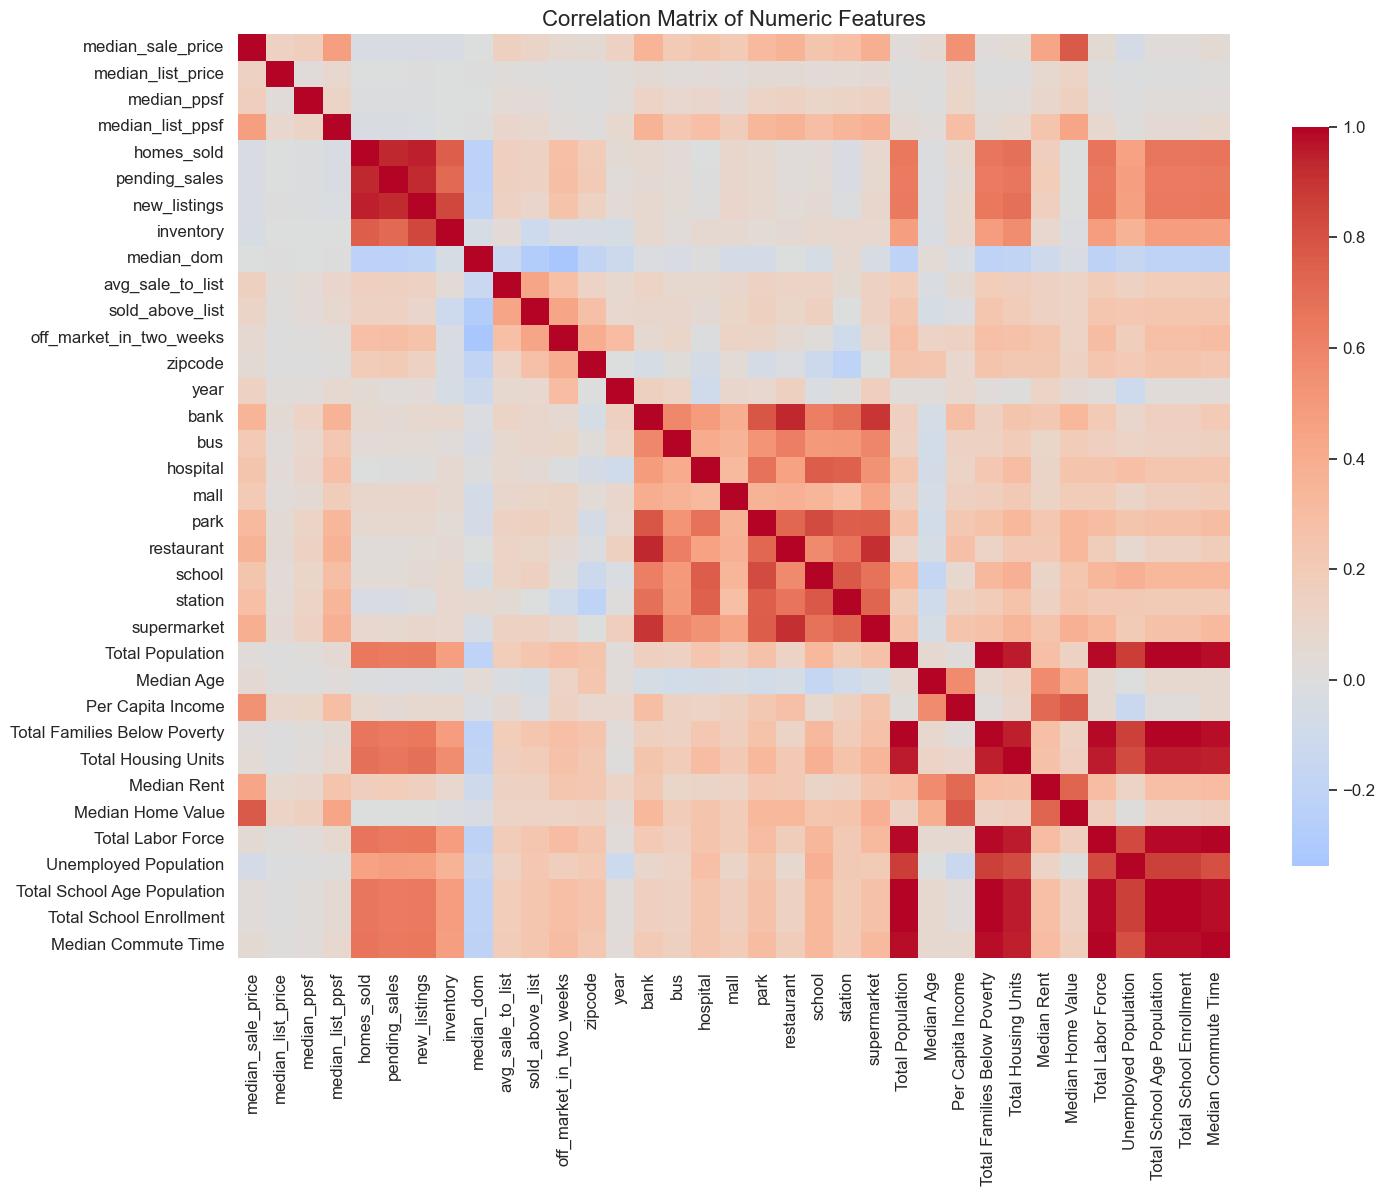

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (exclude the target 'price')
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=["price"], errors="ignore")

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display full matrix as heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix, 
    cmap="coolwarm", 
    center=0, 
    annot=False,   # set to True if you want numbers on cells
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

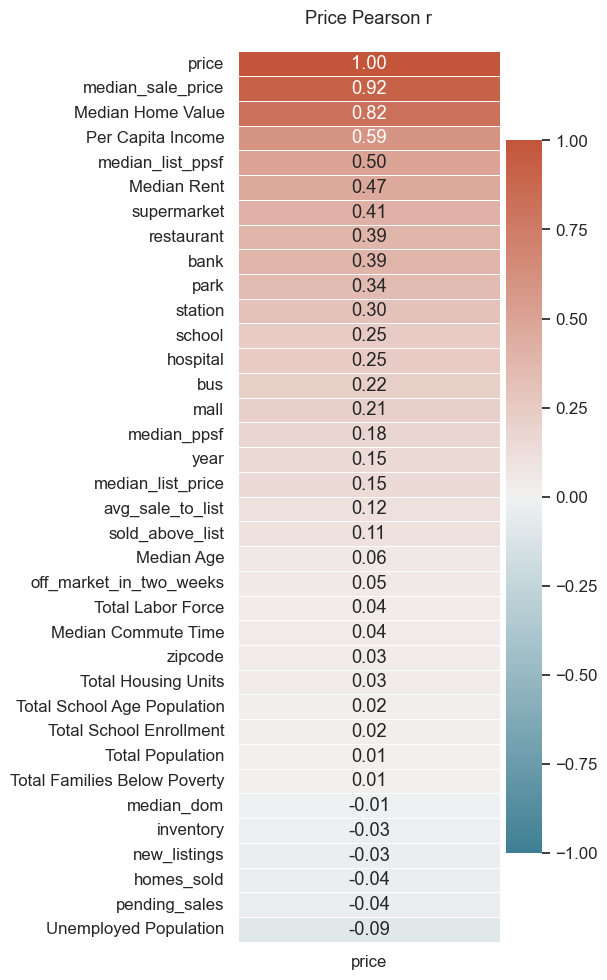

In [40]:
# Compute correlations with price
num_cols = df.select_dtypes("number").columns
corr_vec  = df[num_cols].corr(method="pearson")["price"].sort_values(ascending=False)
sns.set_theme(style="white")     
sns.set(font_scale=1.1)          
plt.figure(figsize=(6,10))       
ax = sns.heatmap(
        corr_vec.to_frame(),     
        annot=True, fmt=".2f",
        vmin=-1, vmax=1,         
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        linewidths=.5, linecolor="white",
        cbar_kws={"shrink":0.8, "pad":0.02}
     )
ax.set_title("Price Pearson r", pad=20)
ax.set_ylabel("")                 
ax.set_xlabel("")
plt.tight_layout()
plt.show()